In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys, os

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 70)

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import *
from visualizer import *

In [79]:
df_ms = pd.read_csv(r"../data/msv7.csv")
df_hs = pd.read_csv(r"../data/hsv7.csv")
df_hs.head()

,name,conduct,age,gender,nationality,pob,tutor/makeup,grade,admission,guardian,time_with_parents,communication_with_parents,reward_for_achievements,parent_understanding,transport_type,residence,travel time,birth_order,exercice,previous_school,mother_tongue,curriculum,sleeping time_in_pm,parenting_style,trauma,type,quality,literature,eng,maths,physics,chemistry,biology,geography,history,civics,amharic,ict,ent-ship,hpe,gpa,matrik
0,abem kibru worku,b,15,m,ethiopian,ethiopia,no,9,paid,both,little,agree,agree,somehow agree,public,zenebework,30-60,middle child,2.0,passion,eth-lang,no,7.0,authoritative,0.0,phy,3.25,76.75,93.67,70.56,72.76,44.70,66.37,73.02,72.19,87.43,96.58,71.31,76.26,64.90,74.3,72.6
1,amanuel demeke hailu,a,14,m,ethiopian,ethiopia,no,9,paid,both,little,agree,strongly agree,somehow agree,private,zenebework,15-,middle child,3.0,gibson,eth-lang,no,7.5,authoritative,0.0,none,3.50,77.52,94.33,62.57,70.85,77.20,69.77,74.17,81.65,76.48,84.84,80.42,77.16,86.00,77.9,75.9
2,ananya girma tegegn,a,14,m,ethiopian,ethiopia,no,9,scholarship,both,a lot,strongly agree,strongly agree,strongly agree,public,cmc,30-60,first child,3.0,dr bekele,eth-lang,no,7.5,authoritative,0.0,none,4.50,88.27,91.67,97.16,85.77,97.90,96.27,95.33,83.40,93.05,97.18,94.27,88.76,89.50,92.2,92.6
3,blen amare mesfin,a,15,f,ethiopian,ethiopia,no,9,paid,both,a lot,strongly agree,strongly agree,strongly agree,service,megenagna,30-60,last child,3.0,magic carpet,eth-lang,no,8.0,permissive,1.0,none,4.50,73.81,91.00,72.55,67.95,76.70,79.35,78.50,75.03,83.81,96.15,88.55,83.16,84.00,80.8,78.1
4,dagmawi misganaw bimerew,a,14,m,ethiopian,ethiopia,yes,9,paid,both,a lot,agree,agree,agree,private,bole bulbula,30-60,middle child,0.0,school of nations,eth-lang,no,8.5,authoritative,0.0,none,3.75,91.77,97.67,90.60,76.69,71.97,84.72,85.04,84.30,88.48,94.10,92.66,85.66,93.25,87.5,84.9


In [80]:
df_ms.columns

Index(['name', 'conduct', 'age', 'gender', 'nationality', 'pob',
       'tutor/makeup', 'grade', 'admission', 'guardian', 'time_with_parents',
       'communication_with_parents', 'reward_for_achievements',
       'parent_understanding', 'transport_type', 'residence', 'travel time',
       'birth_order', 'exercice', 'previous_school', 'mother_tongue',
       'curriculum', 'sleeping time_in_pm', 'parenting_style', 'trauma',
       'type', 'quality', 'english', 'amharic', 'arabic', 'geez', 'ict',
       'maths', 'ss', 'gp', 'is', 'moral', 'hpe', 'art', 'chemistry',
       'physics', 'gpa'],
      dtype='object')

In [81]:
df.gpa.dtype

dtype('float64')

In [82]:
df_hs.rename(columns = {'eng':'english'}, inplace = True)

In [83]:
df_hs.birth_order = df_hs['birth_order'].replace('only child', 'first child')
df_hs.birth_order.value_counts()

first child     80
middle child    47
last child      45
Name: birth_order, dtype: int64

In [84]:
ms_filter = df_ms[['conduct', 'age', 'gender', 'grade', 'admission', 'birth_order', 'gpa', 'maths', 'physics', 'chemistry','amharic', 'geez', 'arabic', 'english', 'ict', 'ss', 'gp','is','hpe']]

In [85]:
hs_filter = df_hs[['conduct', 'age', 'gender', 'grade', 'admission', 'birth_order', 'gpa', 'maths', 'physics' , 'chemistry', 'biology', 'english', 'literature', 'amharic', 'hpe', 'ict', 'geography', 'history']]

In [86]:
frames = [ms_filter, hs_filter]
df = pd.concat(frames)


In [87]:
df.shape

(287, 23)

In [88]:
df.grade.value_counts()

9     57
10    44
12    40
7     37
11    31
8     30
6     26
5     22
Name: grade, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 171
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   conduct      287 non-null    object 
 1   age          287 non-null    float64
 2   gender       287 non-null    object 
 3   grade        287 non-null    int64  
 4   admission    287 non-null    object 
 5   birth_order  287 non-null    object 
 6   gpa          287 non-null    float64
 7   maths        287 non-null    float64
 8   physics      205 non-null    float64
 9   chemistry    205 non-null    float64
 10  amharic      287 non-null    float64
 11  geez         115 non-null    float64
 12  arabic       115 non-null    float64
 13  english      287 non-null    float64
 14  ict          287 non-null    float64
 15  ss           115 non-null    float64
 16  gp           115 non-null    float64
 17  is           115 non-null    float64
 18  hpe          287 non-null    float64
 19  biology 

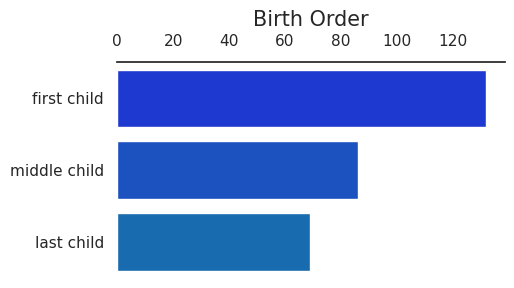

In [90]:
sns.set(rc={'figure.figsize':(5.0,2.8)})
sns.set_palette("winter")
sns.set_style("white")
ax = sns.countplot(data = df, y='birth_order', order=df['birth_order'].value_counts().index)
sns.despine(top=False, left=True, bottom=True)
plt.ylabel("", size=10)
plt.xlabel("", size=10)
plt.title("Birth Order", size=15)
ax.tick_params(bottom=False)
ax.tick_params(left=False)


In [101]:
# mean marks and project submissions for each student
df.groupby('birth_order')[['gpa', 'maths', 'physics', 'chemistry', 'hpe']].mean()

,gpa,maths,physics,chemistry,hpe,english
birth_order,,,,,,
first child,87.354545,80.456873,82.591373,86.182059,92.281124,89.742756
last child,86.742029,79.381739,80.197556,86.115778,91.492029,88.185362
middle child,87.945349,81.276163,86.262759,86.847586,93.285465,89.573605


In [102]:
df.groupby('birth_order')[['english', 'amharic']].mean()

,english,amharic
birth_order,,
first child,89.742756,89.800933
last child,88.185362,86.473478
middle child,89.573605,89.256977


In [92]:
df_hs.groupby('birth_order')[['biology', 'geography', 'history']].mean()

,biology,geography,history
birth_order,,,
first child,85.004348,83.815902,83.491475
last child,85.477353,83.767273,86.706970
middle child,86.563056,84.267000,86.972750


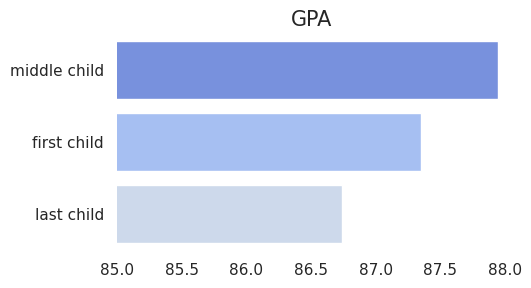

In [93]:
legitbar(df, 'gpa', 'birth_order', 'GPA', 85, 88)

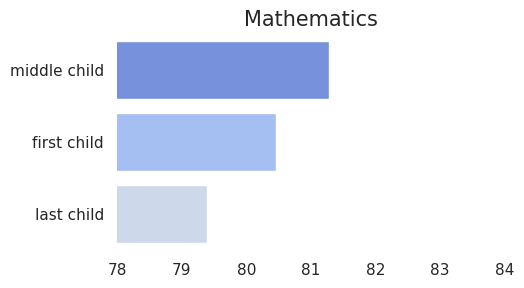

In [94]:
legitbar(df, 'maths', 'birth_order', 'Mathematics', 78, 84)

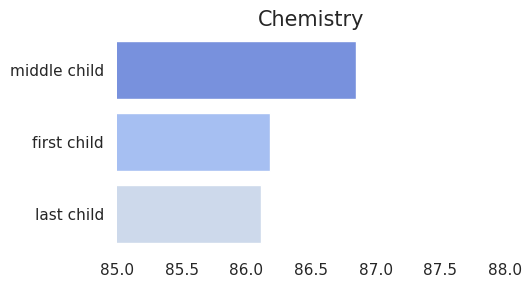

In [95]:
legitbar(df, 'chemistry', 'birth_order', 'Chemistry', 85, 88)



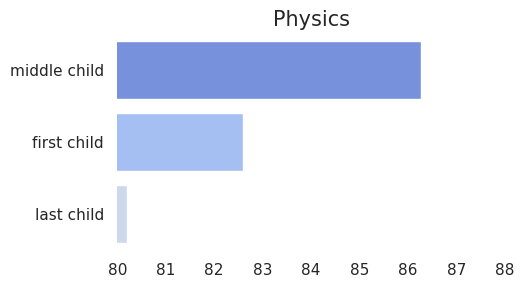

In [96]:
legitbar(df, 'physics', 'birth_order', 'Physics', 80, 88)

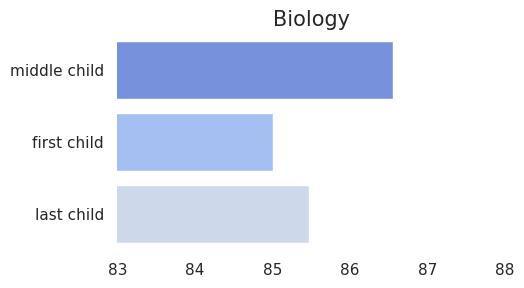

In [97]:
legitbar(df, 'biology', 'birth_order', 'Biology', 83, 88)

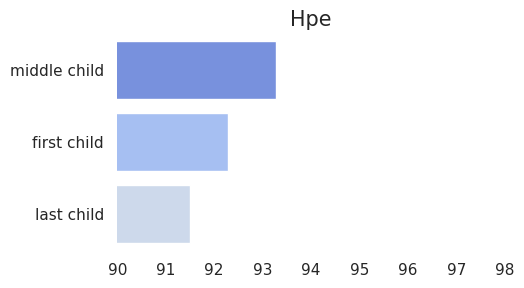

In [98]:
legitbar(df, 'hpe', 'birth_order', 'Hpe', 90, 98)

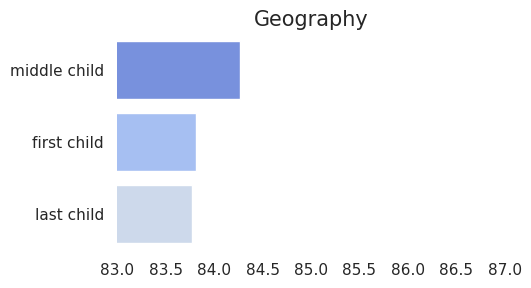

In [99]:
legitbar(df, 'geography', 'birth_order', 'Geography', 83, 87)

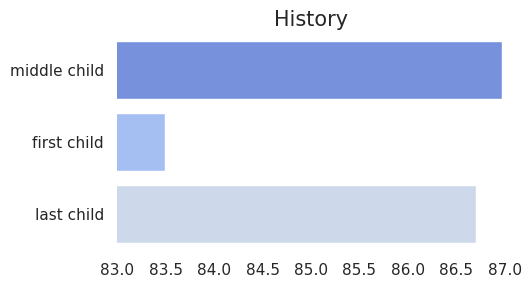

In [100]:
legitbar(df, 'history', 'birth_order', 'History', 83, 87)